In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [23]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [24]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [15]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [16]:
df["Region"].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [17]:
df["Territory"].value_counts()

None          4999
Germany       1682
NW America    1568
Australia     1208
India          809
              ... 
Egypt            1
Burma            1
Georgia          1
Monaco           1
Slovenia         1
Name: Territory, Length: 76, dtype: int64

In [18]:
df_1 = df
df_1["unos"] = 1
pivot = df_1.pivot_table(index = "Region", columns = "Territory", values = "unos", aggfunc = lambda x : x.count())
pivot

Territory,Albania,Armenia,Australia,Austria,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Burma,Cambodia,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,UAE (Dubai),UAE (Others),Ukraine,United Kingdom,Vietnam
Region,,,,,,,,,,,,,,,,,,,,,
APAC,NaN,NaN,1208.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,...,NaN,33.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0
Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMEA,2.0,2.0,NaN,145.0,4.0,285.0,4.0,5.0,NaN,NaN,...,21.0,NaN,NaN,5.0,29.0,12.0,NaN,5.0,313.0,NaN
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN


In [19]:
pivot = pivot.loc[:, pivot.count() != 1]
pivot

Territory,Jordan,KSA,Kuwait,None,SE America,SW America,UAE (Dubai)
Region,,,,,,,
APAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Americas,NaN,NaN,NaN,571.0,483.0,204.0,NaN
EMEA,1.0,2.0,1.0,187.0,10.0,2.0,12.0
Japan,NaN,NaN,NaN,4211.0,NaN,NaN,NaN
Middle East,101.0,11.0,3.0,30.0,NaN,NaN,19.0


In [25]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


# Relacion entre los stages con las regiones

In [87]:
grouped_by_region = df.groupby(['Region','Stage']).agg({'ID':['count']})
grouped_by_region.columns = ['cantidad']
grouped_by_region = grouped_by_region.reset_index()
grouped_by_region

,Region,Stage,cantidad
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


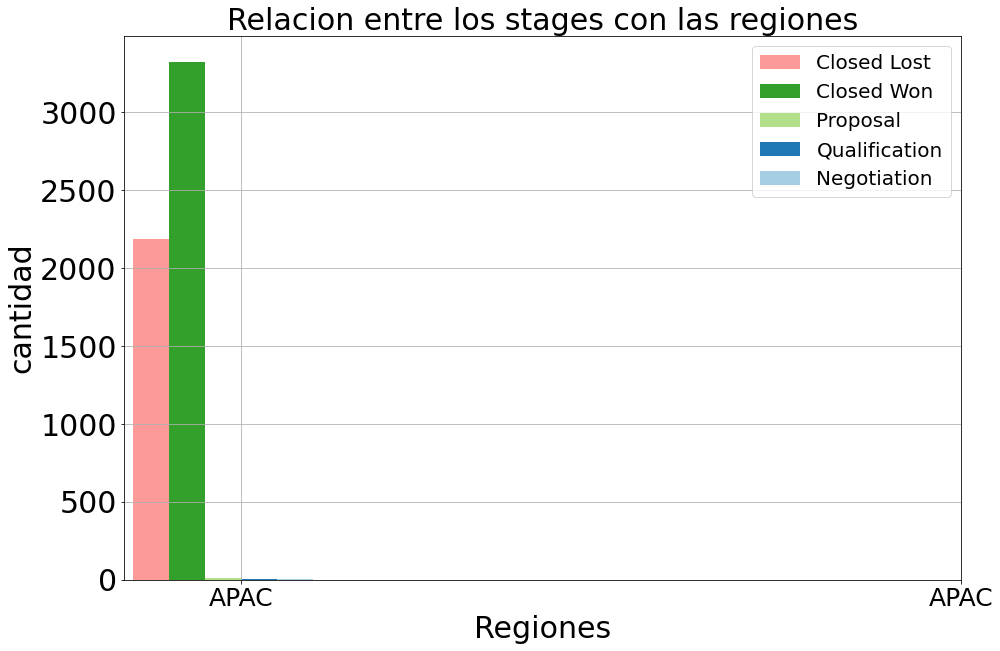

In [104]:
plt.figure(figsize=[15,10])
x=np.arange(1)
y=grouped_by_region['Region']
plt.bar(x,grouped_by_region[grouped_by_region['Stage']=='Closed Lost']['cantidad'], width = 0.05,color=plt.cm.Paired(4),label='Closed Lost')
plt.bar(x+0.05,grouped_by_region[grouped_by_region['Stage']=='Closed Won']['cantidad'], width = 0.05,color=plt.cm.Paired(3),label='Closed Won')
plt.bar(x+0.1,grouped_by_region[grouped_by_region['Stage']=='Proposal']['cantidad'], width = 0.05,color=plt.cm.Paired(2),label='Proposal')
plt.bar(x+0.15,grouped_by_region[grouped_by_region['Stage']=='Qualification']['cantidad'], width = 0.05,color=plt.cm.Paired(1),label='Qualification')
plt.bar(x+0.2,grouped_by_region[grouped_by_region['Stage']=='Negotiation']['cantidad'], width = 0.05,color=plt.cm.Paired(0),label='Negotiation')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25)
plt.yticks(size=30)
plt.title('Relacion entre los stages con las regiones',size=30)
plt.xlabel('Regiones',size=30)
plt.ylabel('cantidad',size=30)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.2, 0.5),prop={'size': 20})
plt.show()